# Research on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

### Step 1. Open the data file and study the general information. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('/datasets/vehicles_us.csv')
display(data.info())
display(data.shape)
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


None

(51525, 13)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


### Conclusion

The file contains 13 columns, from them 7 is an object type, 2 - int type and 4 - float type.
The NaN values we have in the columns from type float: model_year, cylinders, odometer and is_4wd and in the one column from type object: paint_color.
We will analyze in the next steps what is the reason we have the missing values in this columns and also we will fill in the missing values in those columns and remove some rows with missing values. 

### Step 2. Data preprocessing

In [2]:
data['paint_color'] = data['paint_color'].fillna(value='unknown')
display(data.shape)
display(data['is_4wd'].value_counts())
data['is_4wd'] = data['is_4wd'].fillna(0.0)

(51525, 13)

1.0    25572
Name: is_4wd, dtype: int64

In [3]:

data['model_year'] = data.groupby(['model','type'])['model_year'].transform(lambda grp:
                                                                 grp.fillna(np.median(grp))
                                                                )
data.dropna(subset = ['model_year'], inplace = True) 
data['cylinders'] = data.groupby('model')['cylinders'].transform(lambda grp:
                                                                 grp.fillna(np.median(grp))
                                                                )
display(data['cylinders'].value_counts())

data['odometer'] = data.groupby(['model_year'])['odometer'].transform(lambda grp:grp.fillna(np.mean(grp)))
data.info()

8.0     14705
6.0     14648
4.0     12856
10.0      517
5.0       248
3.0        33
12.0        2
Name: cylinders, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47906 entries, 0 to 51524
Data columns (total 13 columns):
price           47906 non-null int64
model_year      47906 non-null float64
model           47906 non-null object
condition       47906 non-null object
cylinders       43009 non-null float64
fuel            47906 non-null object
odometer        47905 non-null float64
transmission    47906 non-null object
type            47906 non-null object
paint_color     47906 non-null object
is_4wd          47906 non-null float64
date_posted     47906 non-null object
days_listed     47906 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Paint color are missing from 9267 rows, so I decided to fill in missing values in this column to value "color is not defined". In the column 'is_4wd' we see only one value: 1.0. It would be logical to assume that the column type should be bollean, in which the value 1.0 is True. For convenient work with the table, I'll leave the float data type, but replace the missing values with 0.0 (False).
As for the model year and the cylinders columns, we will use method transform to find the median value 
for each model and fill with it the missing values. For the column odometer I found the mean value for each model.

### Step 3. Make calculations and add them to the table

In [4]:
data['weekday_posted'] = pd.DatetimeIndex(data['date_posted']).weekday
data['month_posted'] = pd.DatetimeIndex(data['date_posted']).month
data['year_posted'] = pd.DatetimeIndex(data['date_posted']).year
data['vehicles_age'] = data['year_posted'] - data['model_year']
data['vehicles_age'] = data['vehicles_age'].astype('int')
for row in data:
    if (data['vehicles_age'] >= 0).bool:
        data['mileage'] = data['odometer']
    else:
        data['mileage'] = data['odometer']/data['vehicles_age']

display(data['mileage'].describe())
display(data.head())

count     47905.000000
mean     115418.830629
std       62103.131928
min           0.000000
25%       73000.000000
50%      113893.000000
75%      151960.236054
max      990000.000000
Name: mileage, dtype: float64

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicles_age,mileage
0,9400,2011.0,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,unknown,1.0,2018-06-23,19,5,6,2018,7,145000.000000
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,6,110000.000000
3,1500,2003.0,ford f-150,fair,8.0,gas,162071.751024,automatic,pickup,unknown,0.0,2019-03-22,9,4,3,2019,16,162071.751024
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,2,80903.000000
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.000000,automatic,sedan,black,1.0,2018-06-20,15,2,6,2018,4,57954.000000


In [5]:
def condition_to_scale(condition):
    if condition == 'new':
        return 5
    if condition == 'like new':
        return 4
    if condition == 'excellent':
        return 3
    if condition == 'good':
        return 2
    if condition == 'fair':
        return 1
    return 0
data['condition'] = data['condition'].apply(condition_to_scale)
display(data['condition'].value_counts())

3    23074
2    18695
4     4409
1     1492
5      133
0      103
Name: condition, dtype: int64

In [6]:
display(data['cylinders'].value_counts())

8.0     14705
6.0     14648
4.0     12856
10.0      517
5.0       248
3.0        33
12.0        2
Name: cylinders, dtype: int64

For furthes analysis, I added the following columns to the table and calculated values for them:
- columns for day of the week, month, and year the ad was placed;
- vehicle's age (in years) when the ad was placed;
- the vehicle's average mileage per year.

In the column condition I replaced string values with a numeric scale:
- new = 5
- like new = 4
- excellent = 3
- good = 2
- fair = 1
- salvage = 0

### Step 4. Carry out exploratory data analysis

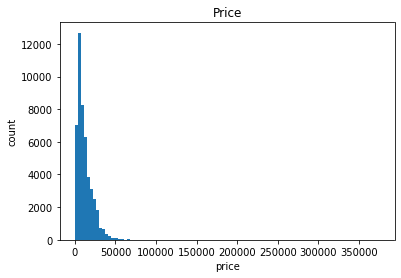

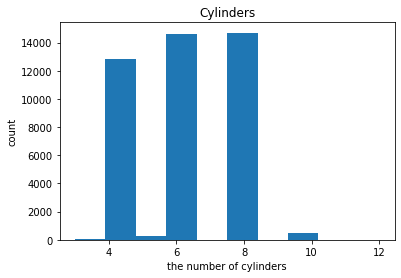

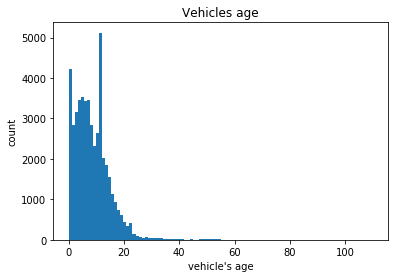

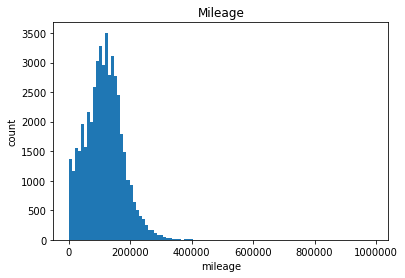

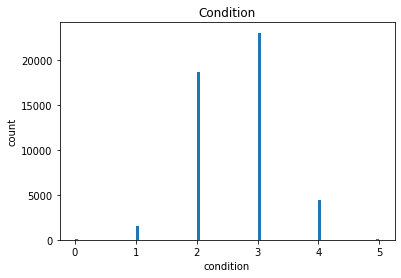

In [7]:
plt.hist(data['price'], bins=100)
plt.title('Price')
plt.xlabel('price')
plt.ylabel('count')
plt.show()

plt.hist(data['cylinders'])
plt.title('Cylinders')
plt.xlabel('the number of cylinders')
plt.ylabel('count')
plt.show()

plt.hist(data['vehicles_age'], bins=100)
plt.title('Vehicles age')
plt.xlabel("vehicle's age")
plt.ylabel('count')
plt.show()

plt.hist(data['mileage'], bins=100)
plt.title('Mileage')
plt.xlabel('mileage')
plt.ylabel('count')
plt.show()

plt.hist(data['condition'], bins=100)
plt.title('Condition')
plt.xlabel('condition')
plt.ylabel('count')
plt.show()


From the graphs above we see a wide variation in vehicles prices, vehicles age and mileage. This is obvious, because in the ads there are both very old cars an a terrible state, and completely new ones.
Lets take a closer look at each chart and determine outliers, remove them and store in a separate DataFrame. 
Also from the histogramms above we see that the most popular vehicles are with 8, 6 and 4 cylinders.
Most often put up for sale the vehicles in excellent and 'like new' condition. 

count     47906.000000
mean      12160.465203
std       10082.453773
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16900.000000
max      375000.000000
Name: price, dtype: float64

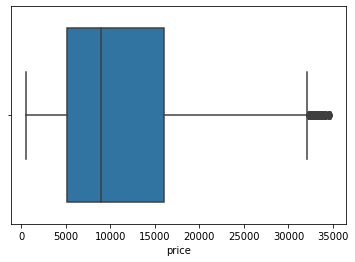

In [8]:
display(data['price'].describe())
Q1_price=data['price'].quantile(0.25)
Q3_price=data['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
data_price_less500 = data.query(
    'price < 500'
)
data_high_price = data.query(
    'price > (@Q3_price + 1.5*@IQR_price)'
)
good_data = data.query(
    'price > 500 & price < (@Q3_price + 1.5*@IQR_price)'
)
data_understated_price = data.query('price < (@Q1_price - 1.5*@IQR_price)')
data_excess_price = data.query('price > (@Q3_price + 1.5*@IQR_price)')
sns.boxplot(x=good_data['price'])

I used the Interquartile range (IQR) to determine the upper limits of outliers. Removed them from the table and stored the outliers into the separate DataFrames: For the column 'price' I determined the lower price limit of 500 dollars (the price below $ 500 is impractical, or the seller didn't want to disclose the price and prefers to bergain with client) and stored the ads which are below this level into the new DataFrame data_price_less500. Upper price limit determined with IQR and stored into the new DataFrame data_high_price.

count    47906.000000
mean         8.556966
std          6.295266
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: vehicles_age, dtype: float64

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicles_age,mileage
63,30000,1966.0,ford mustang,3,NaN,gas,51000.0,manual,convertible,red,0.0,2019-01-23,17,2,1,2019,53,51000.0
140,2000,1993.0,ford f-150,2,8.0,gas,258225.0,automatic,truck,red,0.0,2019-03-06,34,2,3,2019,26,258225.0
255,5500,1981.0,chevrolet corvette,1,8.0,gas,75000.0,automatic,coupe,blue,0.0,2019-01-15,49,1,1,2019,38,75000.0
357,16600,1975.0,chevrolet corvette,3,8.0,gas,75000.0,manual,coupe,unknown,0.0,2019-03-09,69,5,3,2019,44,75000.0
358,18400,1975.0,chevrolet corvette,3,8.0,gas,18000.0,automatic,coupe,orange,0.0,2019-01-06,41,6,1,2019,44,18000.0


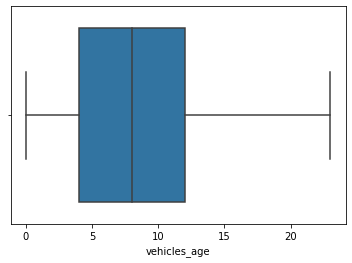

In [9]:
display(data['vehicles_age'].describe())
Q1_age=data['vehicles_age'].quantile(0.25)
Q3_age=data['vehicles_age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
data_old_cars = data.query(
    'vehicles_age > (@Q3_age + 1.5*@IQR_age)'
)
display(data_old_cars.head())
good_data = good_data.query(
    'vehicles_age > (@Q1_age - 1.5*@IQR_age) & vehicles_age < (@Q3_age + 1.5*@IQR_age)')
sns.boxplot(x=good_data['vehicles_age'])

In the column vehicle's age I determined with IQR and deleted outliers, and stored them into the new DataFrame data_old_cars. I didn't delete the small values in this column, since these are not outliers.  If the car is completely new the age value will most likely be 0.

count     47905.000000
mean     115418.830629
std       62103.131928
min           0.000000
25%       73000.000000
50%      113893.000000
75%      151960.236054
max      990000.000000
Name: mileage, dtype: float64

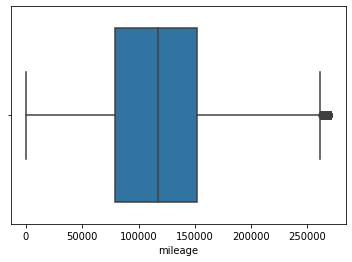

In [10]:
display(data['mileage'].describe())
Q1_mileage=data['mileage'].quantile(0.25)
Q3_mileage=data['mileage'].quantile(0.75)
IQR_mileage = Q3_mileage - Q1_mileage
data_big_mileage = data.query('mileage > (@Q3_mileage + 1.5*@IQR_mileage)')
good_data = good_data.query(
    'mileage > (@Q1_mileage - 1.5*@IQR_mileage) & mileage < (@Q3_mileage + 1.5*@IQR_mileage)'
)
sns.boxplot(x=good_data['mileage'])

In the column mileage I determined with IQR and deleted outliers, and stored them into the new DataFrame data_big_mileage. I didn't delete the small values in this column, since these are not outliers.  If the car is completely new it is possible that the mileage will be 0.

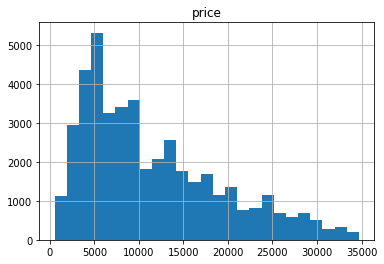

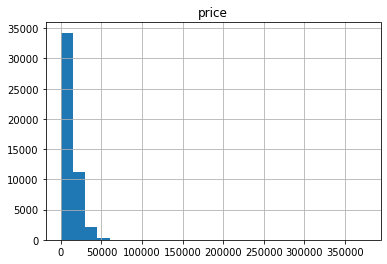

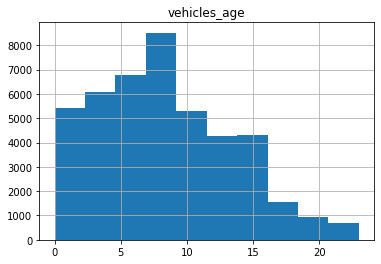

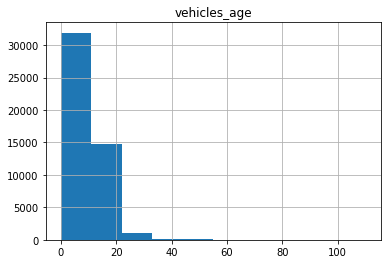

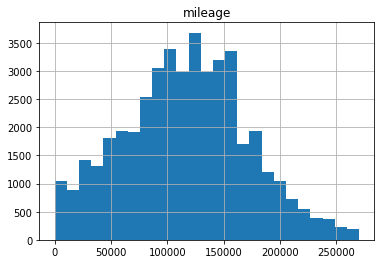

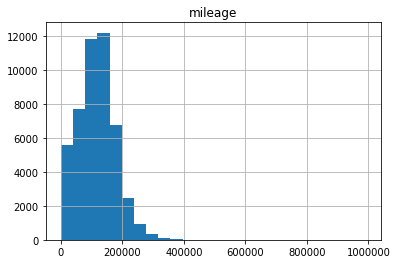

In [11]:
good_data.hist('price', bins=25)
plt.show()
data.hist('price', bins=25)
plt.show()
good_data.hist('vehicles_age')
plt.show()
data.hist('vehicles_age')
plt.show()
good_data.hist('mileage', bins=25)
plt.show()
data.hist('mileage', bins=25)
plt.show()

After deleting the outliers the histogramms look really good.

count    43878.000000
mean        39.579858
std         28.227439
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

The typical lifetime of an ad is in the range: 19.0 - 53.0 days. The median lifetimetime of an ad is 33.0 days


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicles_age,mileage
15,17990,2013.0,ram 1500,3,8.0,gas,103403.558132,automatic,pickup,red,1.0,2018-05-15,111,1,5,2018,5,103403.558132
28,29800,2012.0,chevrolet corvette,3,8.0,gas,57413.000000,automatic,coupe,orange,0.0,2018-10-22,101,0,10,2018,6,57413.000000
34,9500,2008.0,toyota highlander,2,6.0,gas,149799.000000,automatic,SUV,unknown,0.0,2018-06-04,121,0,6,2018,10,149799.000000
51,3800,2012.0,ford focus,2,4.0,gas,130323.000000,automatic,sedan,black,0.0,2018-11-29,261,3,11,2018,6,130323.000000
55,19700,2017.0,chevrolet camaro lt coupe 2d,2,6.0,gas,35807.000000,other,coupe,unknown,0.0,2018-05-16,99,2,5,2018,1,35807.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51476,16900,2016.0,ford explorer,3,4.0,gas,51200.000000,automatic,SUV,white,0.0,2018-07-11,90,2,7,2018,2,51200.000000
51489,1200,2005.0,volkswagen jetta,1,5.0,gas,185000.000000,automatic,sedan,grey,0.0,2018-10-10,158,2,10,2018,13,185000.000000
51493,9450,2015.0,ford focus se,3,4.0,gas,27000.000000,automatic,sedan,grey,0.0,2019-03-22,88,4,3,2019,4,27000.000000
51502,7995,2011.0,chevrolet equinox,4,4.0,gas,111088.000000,automatic,SUV,unknown,0.0,2019-04-01,175,0,4,2019,8,111088.000000


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicles_age,mileage
39,8000,2009.0,ford f-150,2,8.0,gas,234000.000000,automatic,truck,black,1.0,2019-03-31,1,6,3,2019,10,234000.000000
59,5200,2006.0,toyota highlander,2,NaN,gas,186000.000000,automatic,SUV,green,0.0,2018-12-20,2,3,12,2018,12,186000.000000
75,6950,2005.0,chevrolet tahoe,3,NaN,gas,186021.000000,automatic,SUV,unknown,1.0,2018-10-30,3,1,10,2018,13,186021.000000
120,33900,2018.0,chevrolet silverado 1500 crew,2,8.0,gas,11315.000000,other,pickup,white,1.0,2019-03-01,2,4,3,2019,1,11315.000000
131,9500,2009.0,ford f-250,2,8.0,gas,189490.000000,automatic,truck,white,1.0,2018-08-03,6,4,8,2018,9,189490.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51412,12990,2013.0,honda accord,3,6.0,gas,118659.000000,automatic,coupe,red,0.0,2018-05-02,6,2,5,2018,5,118659.000000
51451,4700,2007.0,toyota corolla,3,4.0,gas,144958.583001,automatic,sedan,grey,0.0,2018-07-17,6,1,7,2018,11,144958.583001
51481,7300,2016.0,ford fusion se,3,4.0,gas,106212.000000,automatic,sedan,grey,0.0,2019-03-10,6,6,3,2019,3,106212.000000
51495,9500,2012.0,chevrolet traverse,2,6.0,gas,144500.000000,automatic,SUV,unknown,1.0,2019-03-05,1,1,3,2019,7,144500.000000


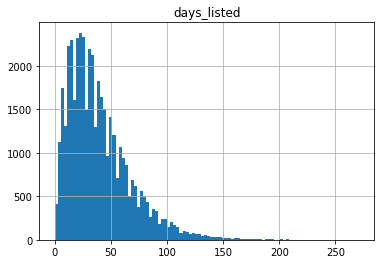

In [12]:
display(good_data['days_listed'].describe())
good_data.hist('days_listed', bins=100)
days_listed_mean = data['days_listed'].mean()
days_listed_median = data['days_listed'].median()
#sns.boxplot(x=data['days_listed'])
standart_deviation = np.std(good_data['days_listed'])
print('The typical lifetime of an ad is in the range: {} - {} days. The median lifetimetime of an ad is {} days'.format(data['days_listed'].quantile(0.25), data['days_listed'].quantile(0.75), days_listed_median))

IQR_days_listed = data['days_listed'].quantile(0.75) - data['days_listed'].quantile(0.25)
ads_long_lifetime = data.query('days_listed > (@IQR_days_listed + 1.5*@IQR_days_listed)')
ads_short_lifetime = data.query('days_listed < 7')
display(ads_long_lifetime)
display(ads_short_lifetime)

The typical lifetime of an ad is in the range: 19.0 - 53.0 days. The median lifetimetime of an ad is 33.0 days, mean lifetime is 39 days. Accordingly, I can conclude that there are many ads in the dataset that were displayed for an abnormally long time, which I stored to the separate DataFrame ads_long_lifetime. Also I stored to a separate DataFrame ads_short_lifetime the ads which were removed quickly.

,mean_price,count
type,,
bus,18107.428571,21
truck,15560.231909,10060
pickup,15173.427686,5808
offroad,14645.830409,171
coupe,14137.429127,1799
convertible,13424.767974,306
SUV,10759.592996,10737
other,10416.133333,210
wagon,9096.352174,1380


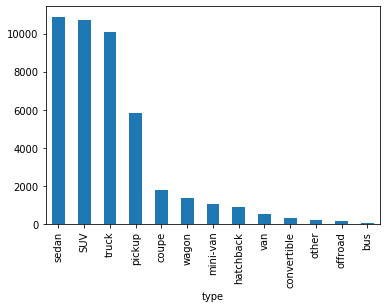

In [13]:
pivot_table_type_price = good_data.pivot_table(index='type', values='price', aggfunc=['mean', 'count'])
pivot_table_type_price.columns = ['mean_price', 'count']
display(pivot_table_type_price.sort_values(by='mean_price', ascending=False))
pivot_table_type_price['count'].sort_values(ascending=False).plot(kind='bar')

Based on the pivot table, the most expensive vehicles are buses and trucks, their average price are 18107 and 15560, respectively.
The two types with the greatest number of ads are truck and SUV. I'll analyze these types in the next part of our investigation.

,price,vehicles_age,mileage,condition
0,9400,7,145000.000000,2
7,15990,6,109473.000000,3
8,11500,6,104174.000000,3
9,9200,11,147191.000000,3
14,12990,10,132285.000000,3
...,...,...,...,...
51498,15900,8,125142.825966,3
51500,6995,6,157000.000000,3
51502,7995,8,111088.000000,4
51505,2000,19,122000.000000,2


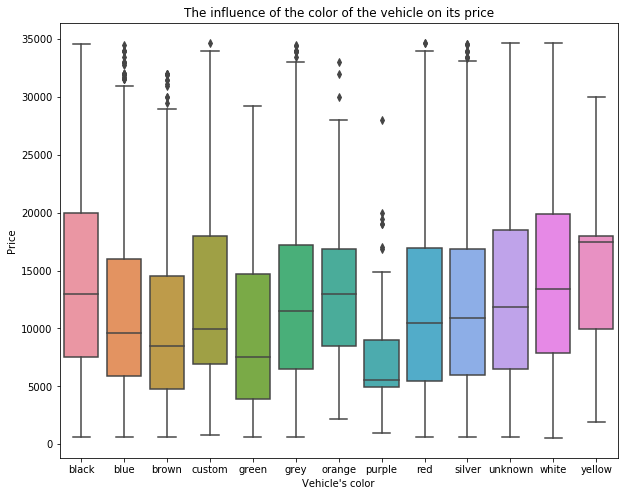

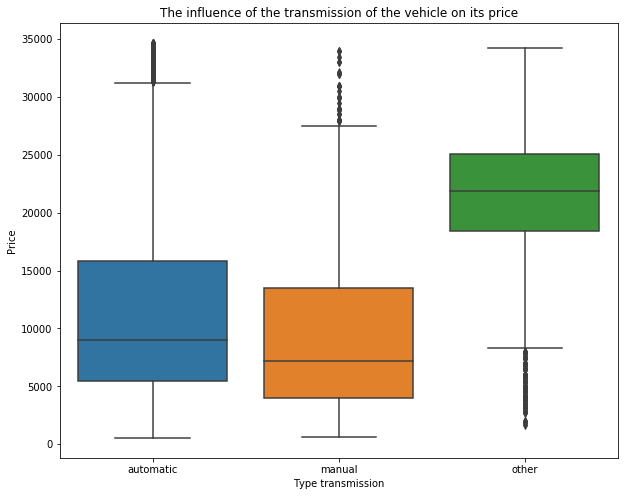

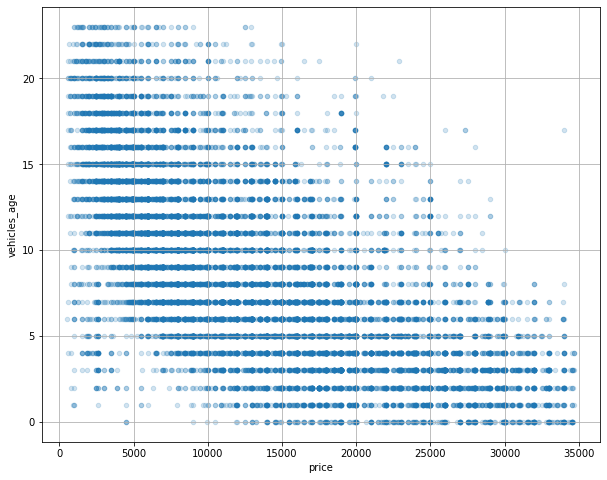

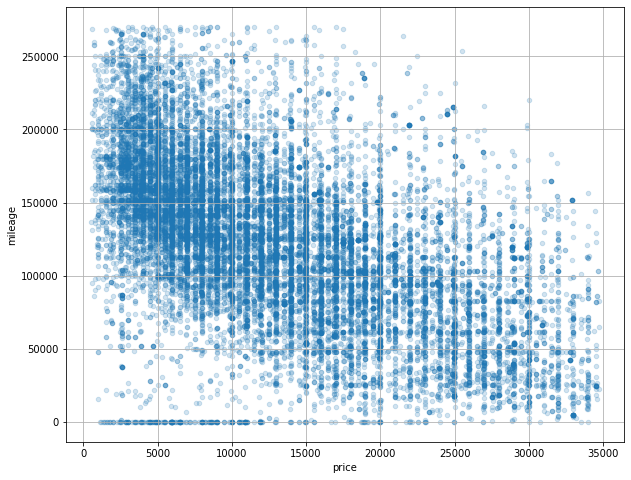

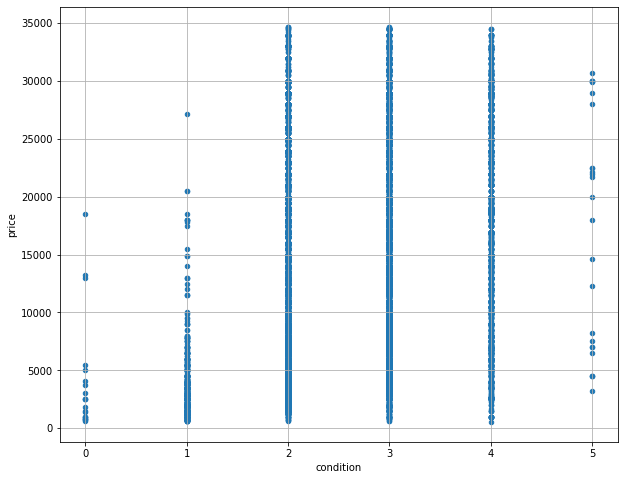

In [14]:
data_truck_suv = good_data[good_data['type'].isin(('truck', 'SUV'))]

data_group_by_color = data_truck_suv.sort_values(by = 'paint_color')

plt.figure(figsize = (10,8))
sns.boxplot(x='paint_color', y='price', data=data_group_by_color)
plt.xlabel("Vehicle's color")
plt.ylabel("Price")
plt.title('The influence of the color of the vehicle on its price')


data_group_by_transmission = good_data.sort_values(by = 'transmission')

plt.figure(figsize = (10,8))
sns.boxplot(x='transmission', y='price', data=data_group_by_transmission)
plt.xlabel("Type transmission")
plt.ylabel("Price")
plt.title('The influence of the transmission of the vehicle on its price')

data_age_mileage_condition = pd.DataFrame()
data_age_mileage_condition['price'] = data_truck_suv['price']
data_age_mileage_condition['vehicles_age'] = data_truck_suv['vehicles_age']
data_age_mileage_condition['mileage'] = data_truck_suv['mileage']
data_age_mileage_condition['condition'] = data_truck_suv['condition']
display(data_age_mileage_condition)

data_age_mileage_condition.plot(x='price', y='vehicles_age', kind='scatter', grid = True, alpha=0.2, figsize = (10,8))
data_age_mileage_condition.plot(x='price', y='mileage', kind='scatter', grid = True, alpha=0.2, figsize = (10,8))

data_age_mileage_condition.plot(x='condition', y='price', kind='scatter', grid = True, figsize = (10,8))

The plotted graphs show the relationship between price and the factors, that we study to determine how strongly each factor affects the determination of the vehicle's price. Conclusions for each graph from this p

### Step 5. Overall conclusion

The price of a vehicle is influenced by a number of factors, like the vehicle's age, mileage, condition, paint color, and type of transmission. The most obvious of the factors which affect the car's price is the mileage and age of the car, the dependence we can see on the scatterplots: the older the car and the more its mileage - the lower the price of the vehicles. And vise versa: the lower the mileage and the newer the car - the higher the price. Condition is a more subjective factor than mileage and vehicle age, but from the investigation, I can conclude that the fair and salvage conditions are rated in the price least of all.
In terms of transmission, the average price of a manual transmission is much lower than the others.
The paint color of the vehicle also can have a major impact on price. The most expensive cars are cars with traditional colors: black and white.